# Qiskit Visualization

このnotebookは[Qiskit Documentaion](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html)を参考に作成しています。

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## 測定結果のプロット

In [3]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure(range(2), range(2))

backend = BasicAer.get_backend('qasm_simulator')
qc = meas.compose(bell, front=True) # frontをTrueにしないと測定が先に来てしまう
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
print(counts)

{'11': 514, '00': 486}


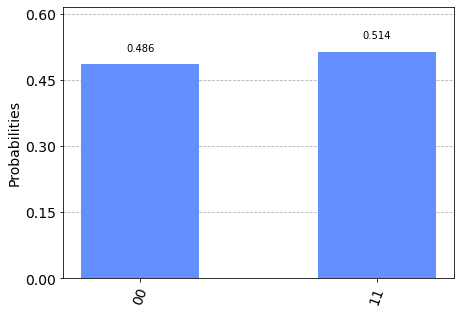

In [4]:
plot_histogram(counts)

No classical registers in circuit "circuit-9", counts will be empty.
C:\Users\DaikiMurata\Anaconda3\envs\qiskit\lib\site-packages\qiskit\visualization\counts_visualization.py:234: RuntimeWarning: invalid value encountered in true_divide
  pvalues = values / sum(values)


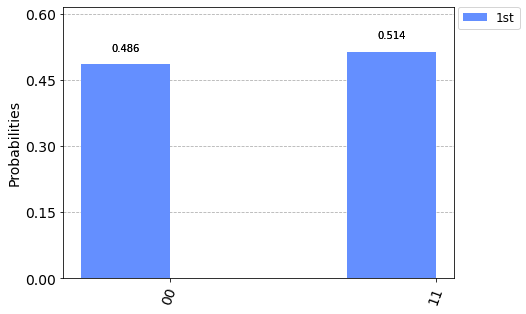

In [5]:
# 凡例をつける
second_result = execute(bell, backend, shots=1000).result()
second_counts = second_result.get_counts(bell)
legend = ['1st', '2nd']
plot_histogram([counts, second_counts], legend=legend)

## 状態のプロット

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(bell, backend).result()
psi = result.get_statevector(bell)

### plot_state_city
状態行列の実部、虚部をそれぞれヒストグラムで表現する

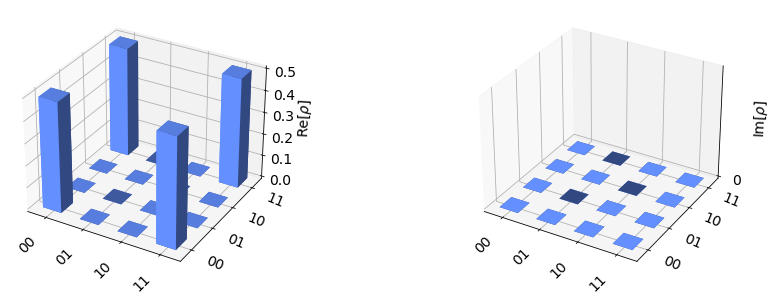

In [7]:
from qiskit.visualization import plot_state_city
plot_state_city(psi)

### plot_state_hinton
上と同じ(2D)

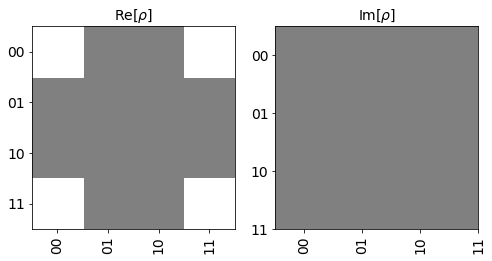

In [8]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(bell)

### plot_state_qsphere
振幅と位相を球体上で表現する

C:\Users\DaikiMurata\Anaconda3\envs\qiskit\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


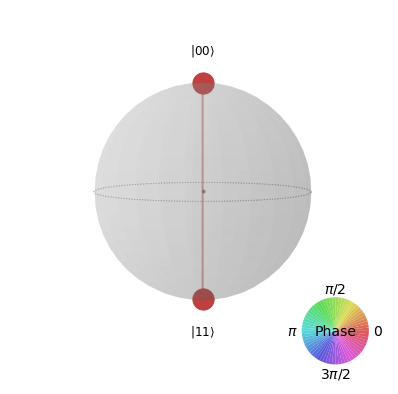

In [9]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(psi)

### plot_state_paulivec
パウリ演算子を用いて表現

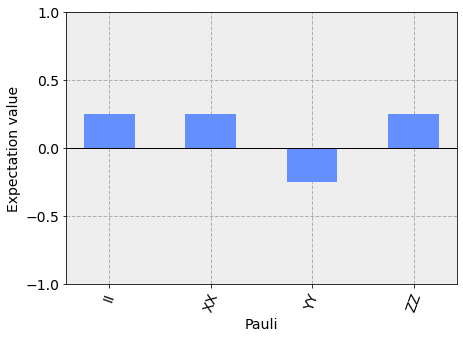

In [10]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(psi)

### plot_bloch_multivector
単一量子ビットのブロッホ球に射影する

C:\Users\DaikiMurata\Anaconda3\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


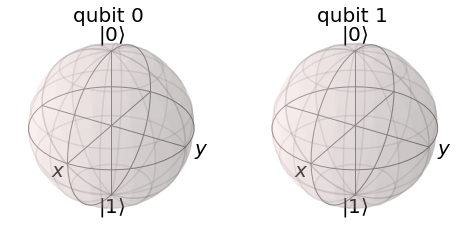

In [11]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)